 Import Libraries

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


Load and Display Data

In [22]:
# Load the dataset
df = pd.read_csv('advertising.csv')

# Inspect the dataset
print(df.head())
print(df.info())
print(df.describe())
# Check for missing values
print(df.isnull().sum())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

Exploratory Data Analysis (EDA)

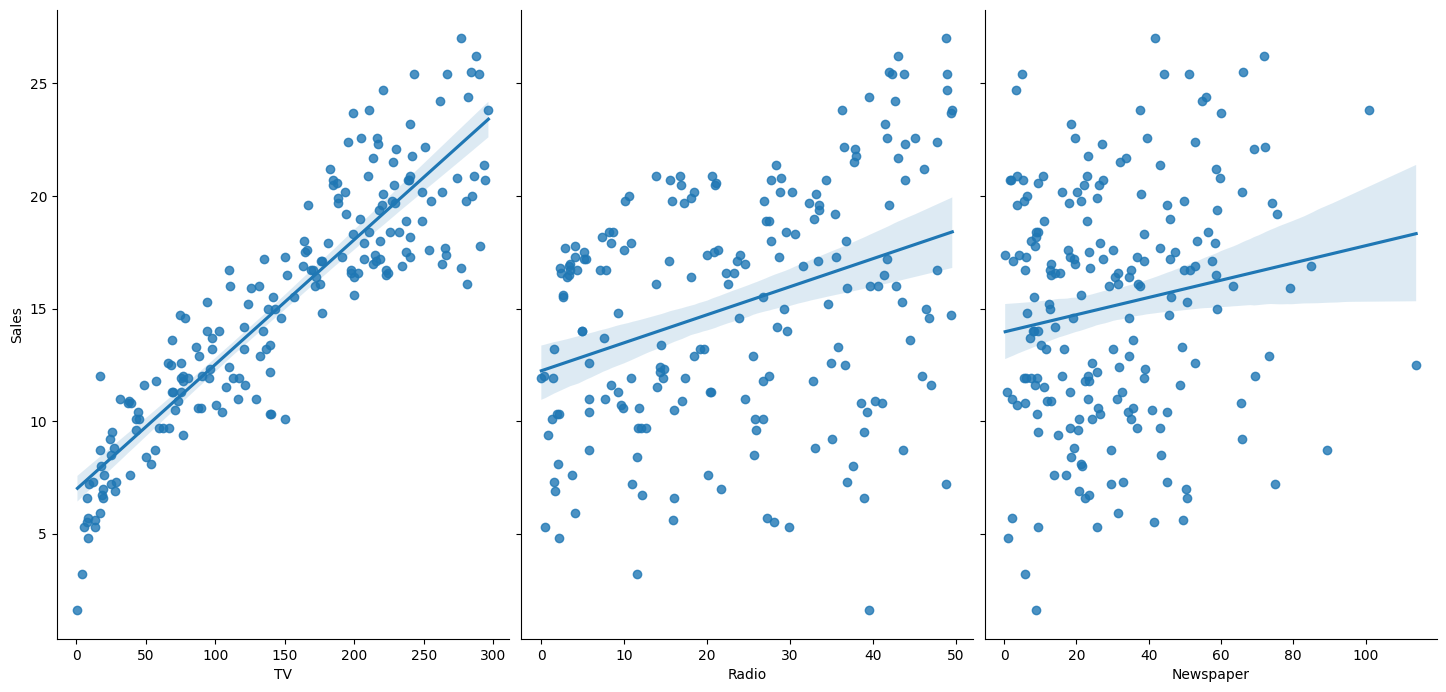

In [23]:
# Perform some exploratory data analysis
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')
plt.show()


Data Preprocessing

In [24]:
# Split the data into features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Initialization and Hyperparameter Tuning

In [25]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Model Training and Evaluation

In [26]:
# Train the model with the best parameters
best_gbr = grid_search.best_estimator_
best_gbr.fit(X_train, y_train)

# Make predictions
y_pred = best_gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1.4597809465162035
R² Score: 0.9527595798688007


Visualization

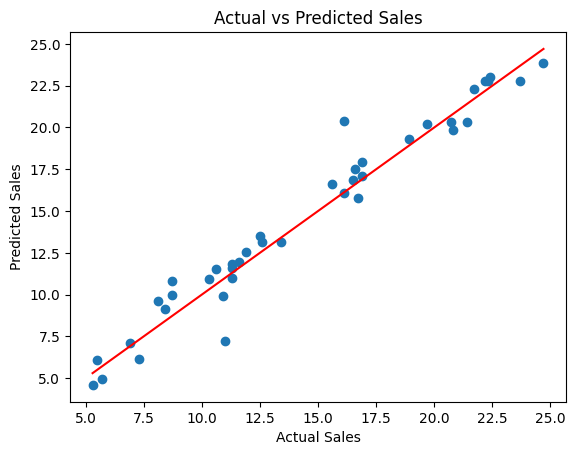

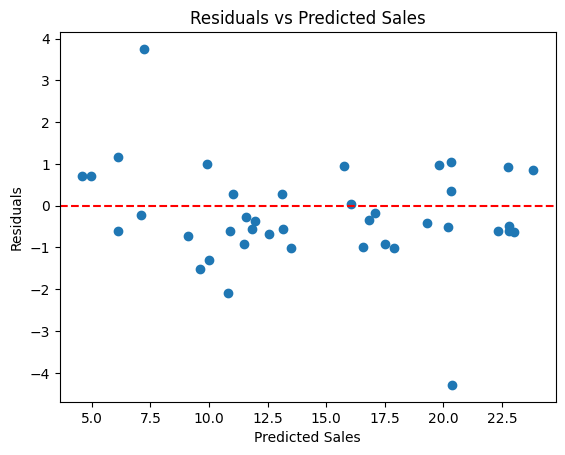

In [27]:
# Visualize the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()


Make Predictions with Sample Data Input

In [30]:
# Section 8: Make Predictions with Sample Data Input

# Define a function to make predictions
def predict_sales(tv, radio, newspaper):
    sample_data = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})
    predicted_sales = best_gbr.predict(sample_data)
    return predicted_sales[0]

# Example sample inputs
sample_tv = 150.0
sample_radio = 25.0
sample_newspaper = 30.0

# Predict sales for the sample input
predicted_sales = predict_sales(sample_tv, sample_radio, sample_newspaper)
print(f"Predicted Sales: {predicted_sales}")


Predicted Sales: 13.888344646200979
